In [6]:
!dir data

 驱动器 C 中的卷是 OS
 卷的序列号是 92E3-E237

 C:\Users\a\Jupyter\百度松果菁英班\Machine_Learning_with_Python\tradition\data 的目录

2024/05/05  19:05    <DIR>          .
2024/05/05  19:06    <DIR>          ..
2024/05/05  19:05        11,601,259 mnist.zip
               1 个文件     11,601,259 字节
               2 个目录 48,177,901,568 可用字节


In [7]:
!unzip data\mnist.zip

Archive:  data/mnist.zip
   creating: mnist/                
  inflating: mnist/t10k-images-idx3-ubyte.gz  
   creating: __MACOSX/             
   creating: __MACOSX/mnist/       
  inflating: __MACOSX/mnist/._t10k-images-idx3-ubyte.gz  
  inflating: mnist/train-images-idx3-ubyte.gz  
  inflating: __MACOSX/mnist/._train-images-idx3-ubyte.gz  
  inflating: mnist/train-labels-idx1-ubyte.gz  
  inflating: __MACOSX/mnist/._train-labels-idx1-ubyte.gz  
  inflating: mnist/t10k-labels-idx1-ubyte.gz  
  inflating: __MACOSX/mnist/._t10k-labels-idx1-ubyte.gz  


In [8]:
!gzip -dfq mnist/train-labels-idx1-ubyte.gz
!gzip -dfq mnist/t10k-labels-idx1-ubyte.gz
!gzip -dfq mnist/train-images-idx3-ubyte.gz
!gzip -dfq mnist/t10k-images-idx3-ubyte.gz

C:\Users\a\AppData\Local\Temp\ipykernel_21352\1163190650.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('label:%i' % it)


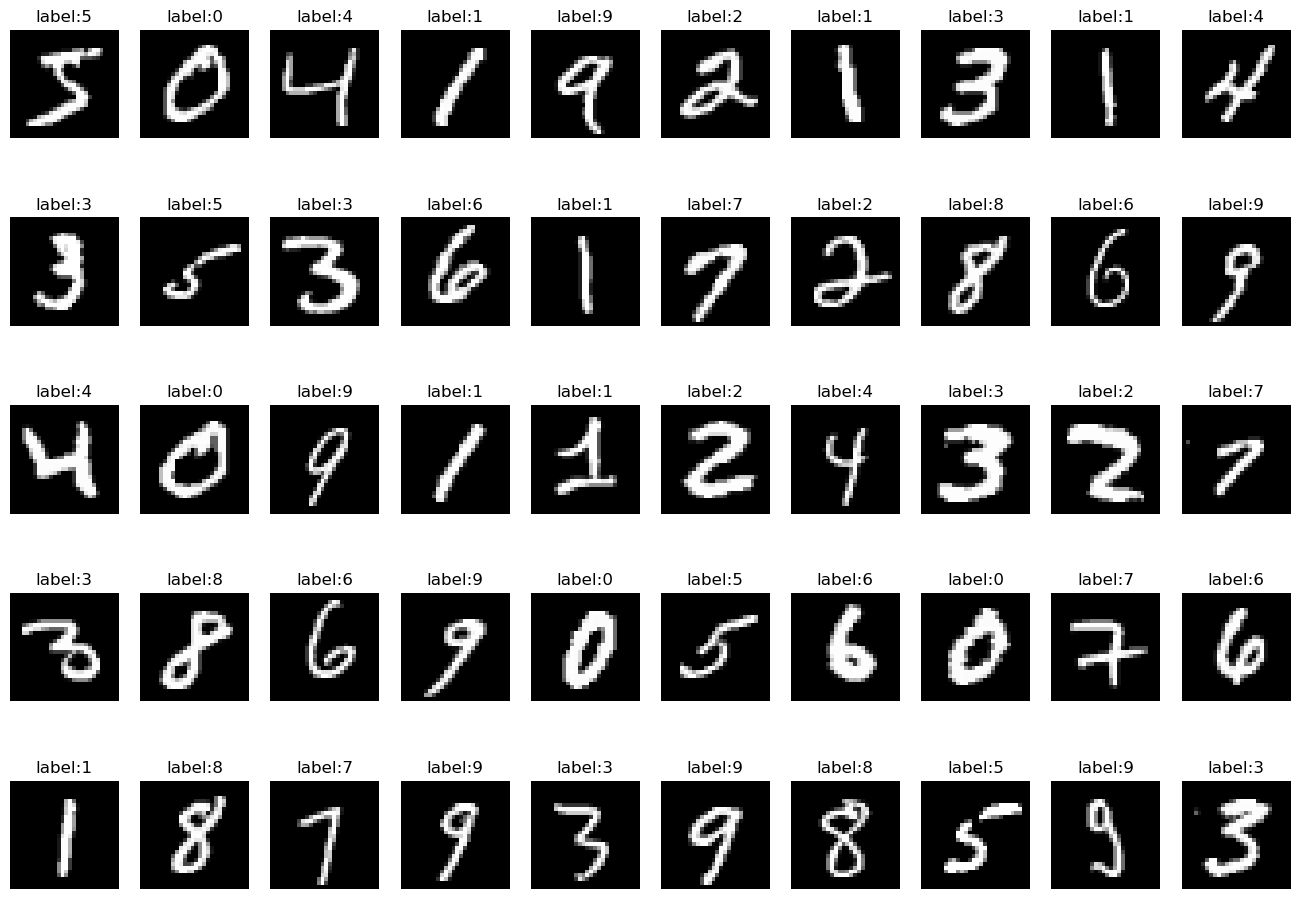

In [9]:
import struct,os
import numpy as np
from array import array as pyarray
from numpy import append, array, int8, uint8, zeros
import matplotlib.pyplot as plt

%matplotlib inline 
def load_mnist(image_file, label_file, path="mnist"):
    digits=np.arange(10)

    fname_image = os.path.join(path, image_file)
    fname_label = os.path.join(path, label_file)

    flbl = open(fname_label, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()

    fimg = open(fname_image, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    images = zeros((N, rows*cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((1, rows*cols))
        labels[i] = lbl[ind[i]]

    return images, labels


train_image, train_label = load_mnist("train-images-idx3-ubyte", "train-labels-idx1-ubyte")
test_image, test_label = load_mnist("t10k-images-idx3-ubyte", "t10k-labels-idx1-ubyte")

import matplotlib.pyplot as plt

def show_image(imgdata,imgtarget,show_column, show_row):
    #注意这里的show_column*show_row==len(imgdata)
    for index,(im,it) in enumerate(list(zip(imgdata,imgtarget))):
        xx = im.reshape(28,28)
        plt.subplots_adjust(left=1, bottom=None, right=3, top=2, wspace=None, hspace=None)
        plt.subplot(show_row, show_column, index+1)
        plt.axis('off')
        plt.imshow(xx , cmap='gray',interpolation='nearest')
        plt.title('label:%i' % it)
# 显示训练集前50数字
show_image(train_image[:50], train_label[:50], 10,5)

In [10]:
train_image=[im/255.0 for im in train_image]
test_image=[im/255.0 for im in test_image]

In [14]:
len(train_image)

60000

In [15]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(train_image,train_label.ravel())

KNeighborsClassifier(n_neighbors=10)

In [16]:
predict = knc.predict(test_image)
print("accuracy_score: %.4lf" % accuracy_score(predict,test_label))

accuracy_score: 0.9665


各分类模型准确度比较：


<table><thead><tr><th>模型</th><th>准确度</th></tr></thead><tbody><tr><td>K-Nearest Neighbor Classification</td><td>0.9665</td></tr><tr><td>Naive Bayes</td><td>0.8375</td></tr><tr><td>Decision Tree</td><td>0.8758</td></tr><tr><td>Random Forest</td><td>0.9486</td></tr><tr><td>Logistic Regression</td><td>0.9202</td></tr><tr><td>Support Vector Machine</td><td>0.9769</td></tr></tbody></table>

模型在使用的时候，参数的调整也是十分重要的。应该根据数据类型来进行调参和模型选择，才会有很好的拟合效果。但这不是这篇博客的主要目的，之后可以对参数进行研讨。

我们可以将预测结果展示出来：
